Finding plane of road using point cloud

0.709848
0.777568
0.845288
0.45410300000000003
0.521823
0.589543
0.198358
0.33379800000000004
2.399464
1.470243
solution:
0.041149 x + 0.006772 y + -0.245412 = z
errors:
[[-0.30984233]
 [-0.37756341]
 [-0.4452845 ]
 [-0.15409852]
 [-0.22181961]
 [-0.28954069]
 [ 0.00164528]
 [-0.13379689]
 [ 1.00053863]
 [ 0.92976202]]
residual:
1.5738672353872176


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


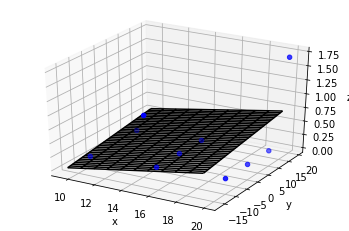

Points error
[[-0.30984233]]
[[-0.37756341]]
[[-0.4452845]]
[[-0.15409852]]
[[-0.22181961]]
[[-0.28954069]]
[[0.00164528]]
[[-0.13379689]]
[[1.00053863]]
[[0.92976202]]


In [1]:
import matplotlib.pyplot as plt
import numpy as np

N_POINTS = 10

# create random data
xs = [20, 20, 20, 15, 15, 15, 10, 10, 20, 15]
ys = [-10, 0, 10, -10, 0, 10, -10, 10, 18, -15]
zs = [ 0.2, 0.2, 0.2, 0.15, 0.15, 0.15, 0.1, 0.1, 1.7, 1.2]


# plot raw data
plt.figure()
ax = plt.subplot(111, projection='3d')
ax.scatter(xs, ys, zs, color='b')

# do fit
tmp_A = []
tmp_b = []
for i in range(len(xs)):
    tmp_A.append([xs[i], ys[i], 1])
    tmp_b.append(zs[i])
    print(0.041149 * xs[i] + 0.006772 * ys[i] + zs[i] - 0.245412)
b = np.matrix(tmp_b).T
A = np.matrix(tmp_A)
fit = (A.T * A).I * A.T * b
errors = b - A * fit
residual = np.linalg.norm(errors)

print ("solution:")
print ("%f x + %f y + %f = z" % (fit[0], fit[1], fit[2]))
print ("errors:")
print (errors)
print ("residual:")
print (residual)

# plot plane
xlim = ax.get_xlim()
ylim = ax.get_ylim()
X,Y = np.meshgrid(np.arange(xlim[0], xlim[1]),
                  np.arange(ylim[0], ylim[1]))
Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        Z[r,c] = fit[0] * X[r,c] + fit[1] * Y[r,c] + fit[2]
ax.plot_wireframe(X,Y,Z, color='k')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

a = 0
print("Points error")
for i in range(len(xs)):
  print(-fit[0] * xs[i] - fit[1] * ys[i] + zs[i] -fit[2])


In [10]:
import numpy as np
print('Enter error value')
ERROR = input()
ERROR = float(ERROR)
print('Enter number of points')
PNUMBER = input()
PNUMBER = int(PNUMBER)

def checking(a, er):
  sum = 0
  for i in range(len(a)):
    if (abs(a[i]) > er): sum = sum + 1
  sum = sum / len(a)
  if sum > 0.5: return 0
  else: return 1
      
#Ax+By+Cz+d=0

#finding best сoeff
tmp_A = []
tmp_b = []
xs = []
ys = []
zs = []

for i in range(PNUMBER):
    print('Input %d point' % i)
    x, y, z = input().split()
    x = float(x)
    y = float(y)
    z = float(z)
    xs.append(x)
    ys.append(y)
    zs.append(z)
    tmp_A.append([x, y, 1])
    tmp_b.append(z)
b = np.matrix(tmp_b).T
A = np.matrix(tmp_A)
fit = (A.T * A).I * A.T * b

tmp_C = []

for i in range(PNUMBER):
    x = float(xs[i])
    y = float(ys[i])
    z = float(zs[i])
    tmp_C.append(float(-fit[0] * x -fit[1] * y + z -fit[2]))
    
if checking(tmp_C, ERROR): print ("%f  %f 1 %f" % (-fit[0], -fit[1], -fit[2]))
else: 
  tmp_A = []
  tmp_b = []
  for j in range(PNUMBER // 2):
    buf = tmp_C.index(max(tmp_C))   
    del tmp_C[buf]
    del xs[buf]
    del ys[buf]
    del zs[buf]
  for i in range(len(xs)):
    x = float(xs[i])
    y = float(ys[i])
    z = float(zs[i])
    tmp_A.append([x, y, 1])
    tmp_b.append(z)
  b = np.matrix(tmp_b).T
  A = np.matrix(tmp_A)
  fit = (A.T * A).I * A.T * b
  print ("%f  %f 1 %f" % (-fit[0], -fit[1], -fit[2]))
  
  tmp_C=[]



#   print('Checking')
#   for i in range(len(xs)):
#     x = float(xs[i])
#     y = float(ys[i])
#     z = float(zs[i])
#     tmp_C.append(float(-fit[0] * x -fit[1] * y + z -fit[2]))
#   print(tmp_C)
#   print("Checking is: %f", checking(tmp_C, ERROR))


Enter error value
1
Enter number of points
4
Input 0 point
1 2 3
Input 1 point
1 1 1
Input 2 point
4 4 4
Input 3 point
5 5 5
1.000000  -2.000000 1 0.000000
